In [1]:
##DATA CLEANING AND EXPLORATORY ANALYSIS

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dftrain= pd.read_csv("C:/projects/house prices/house-prices-advanced-regression-techniques/train.csv")
dftest=pd.read_csv("C:\projects\house prices\house-prices-advanced-regression-techniques/test.csv")
#dftrain=pd.concat([df1,dftest],axis=0)

In [4]:
dftrain['FireplaceQu'].fillna("NA",inplace=True)
dftrain['GarageType'].fillna("NA",inplace=True)
dftrain['GarageFinish'].fillna("NA",inplace=True)
dftrain['GarageQual'].fillna("NA",inplace=True)
dftrain['GarageCond'].fillna("NA",inplace=True)
dftrain['MasVnrType'].fillna("NA",inplace=True)
dftrain['BsmtQual'].fillna(dftrain["BsmtQual"].mode()[0],inplace=True)
dftrain['MasVnrArea'].fillna(dftrain["MasVnrArea"].mean(),inplace=True)
dftrain['BsmtCond'].fillna(dftrain["BsmtCond"].mode()[0],inplace=True)
dftrain['BsmtExposure'].fillna(dftrain["BsmtExposure"].mode()[0],inplace=True)
dftrain['BsmtFinType1'].fillna(dftrain["BsmtFinType1"].mode()[0],inplace=True)
dftrain['BsmtFinType2'].fillna(dftrain["BsmtFinType2"].mode()[0],inplace=True)
dftrain['Electrical'].fillna(dftrain["Electrical"].mode()[0],inplace=True)
dftrain['LotFrontage'].fillna(dftrain["LotFrontage"].mean(),inplace=True)

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

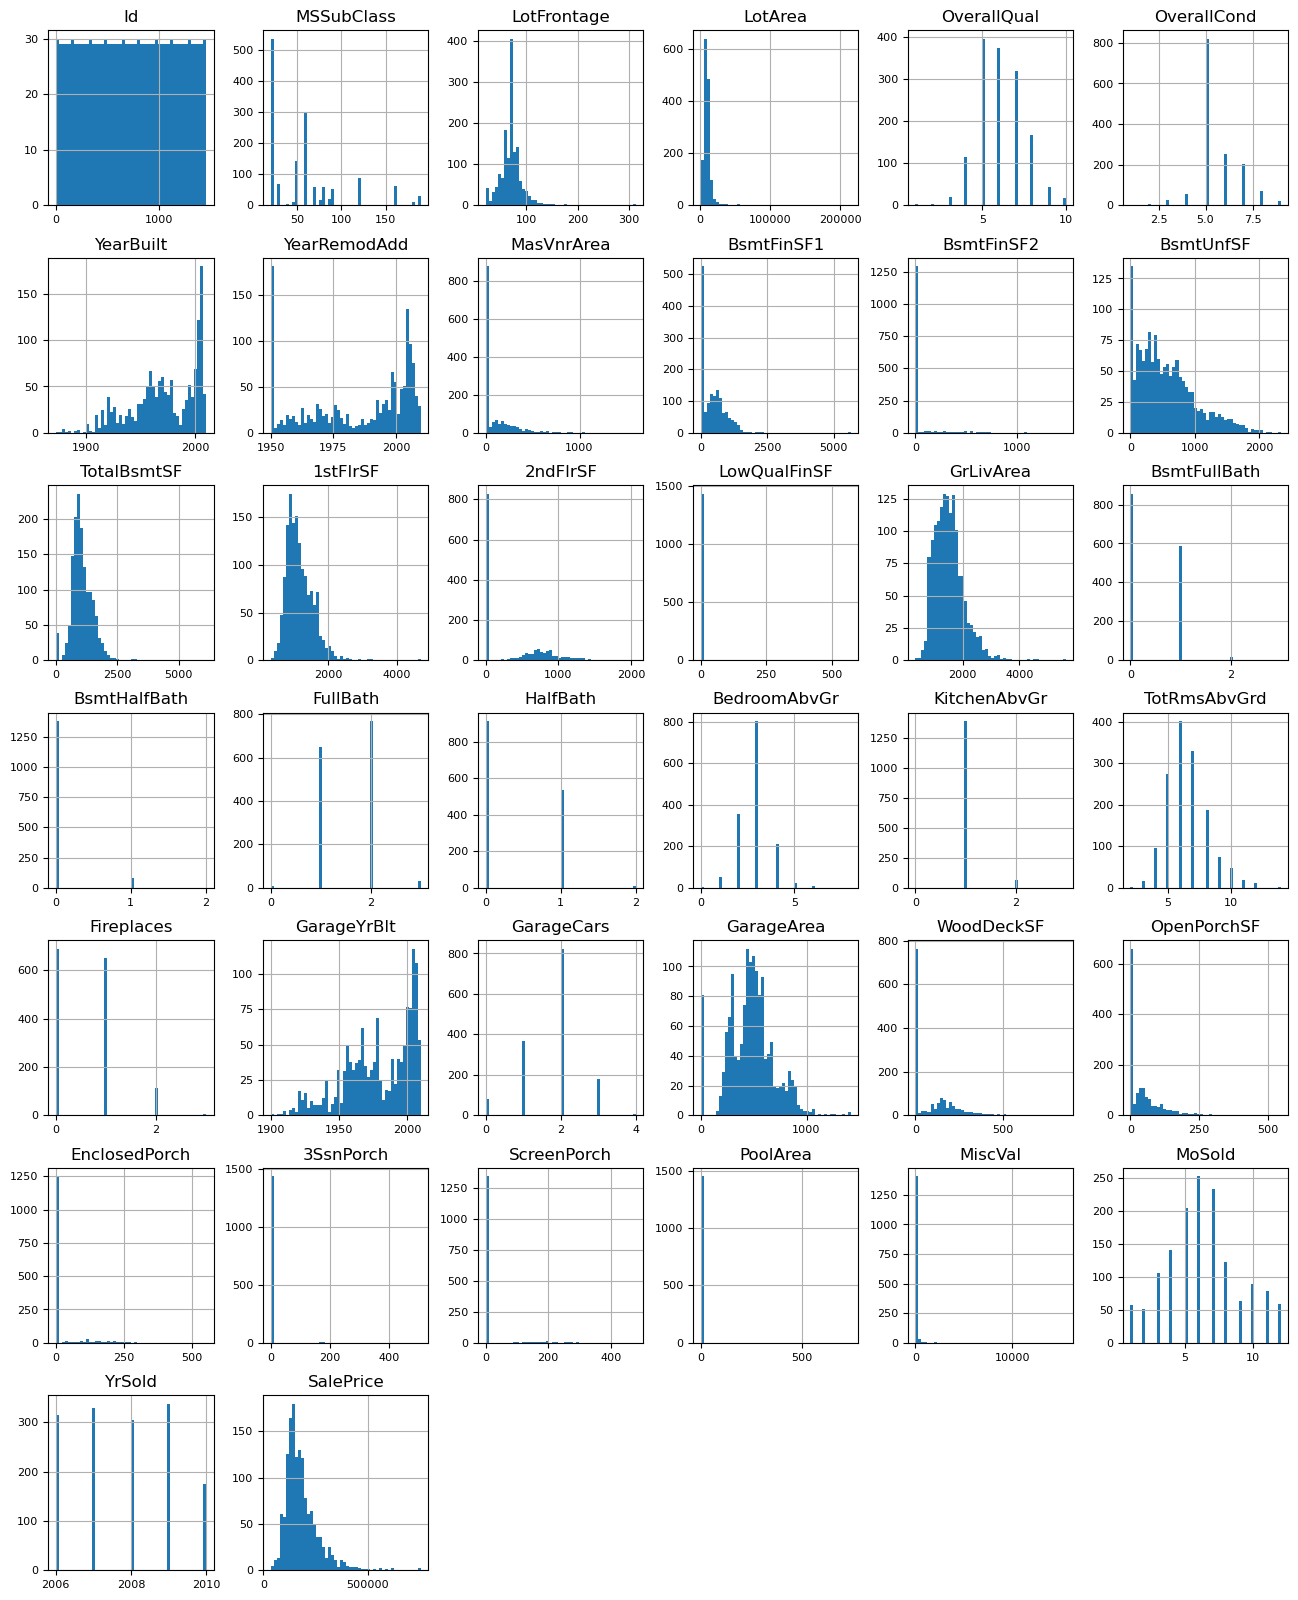

In [6]:
df_num = dftrain.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [7]:
s = (dftrain.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)


Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

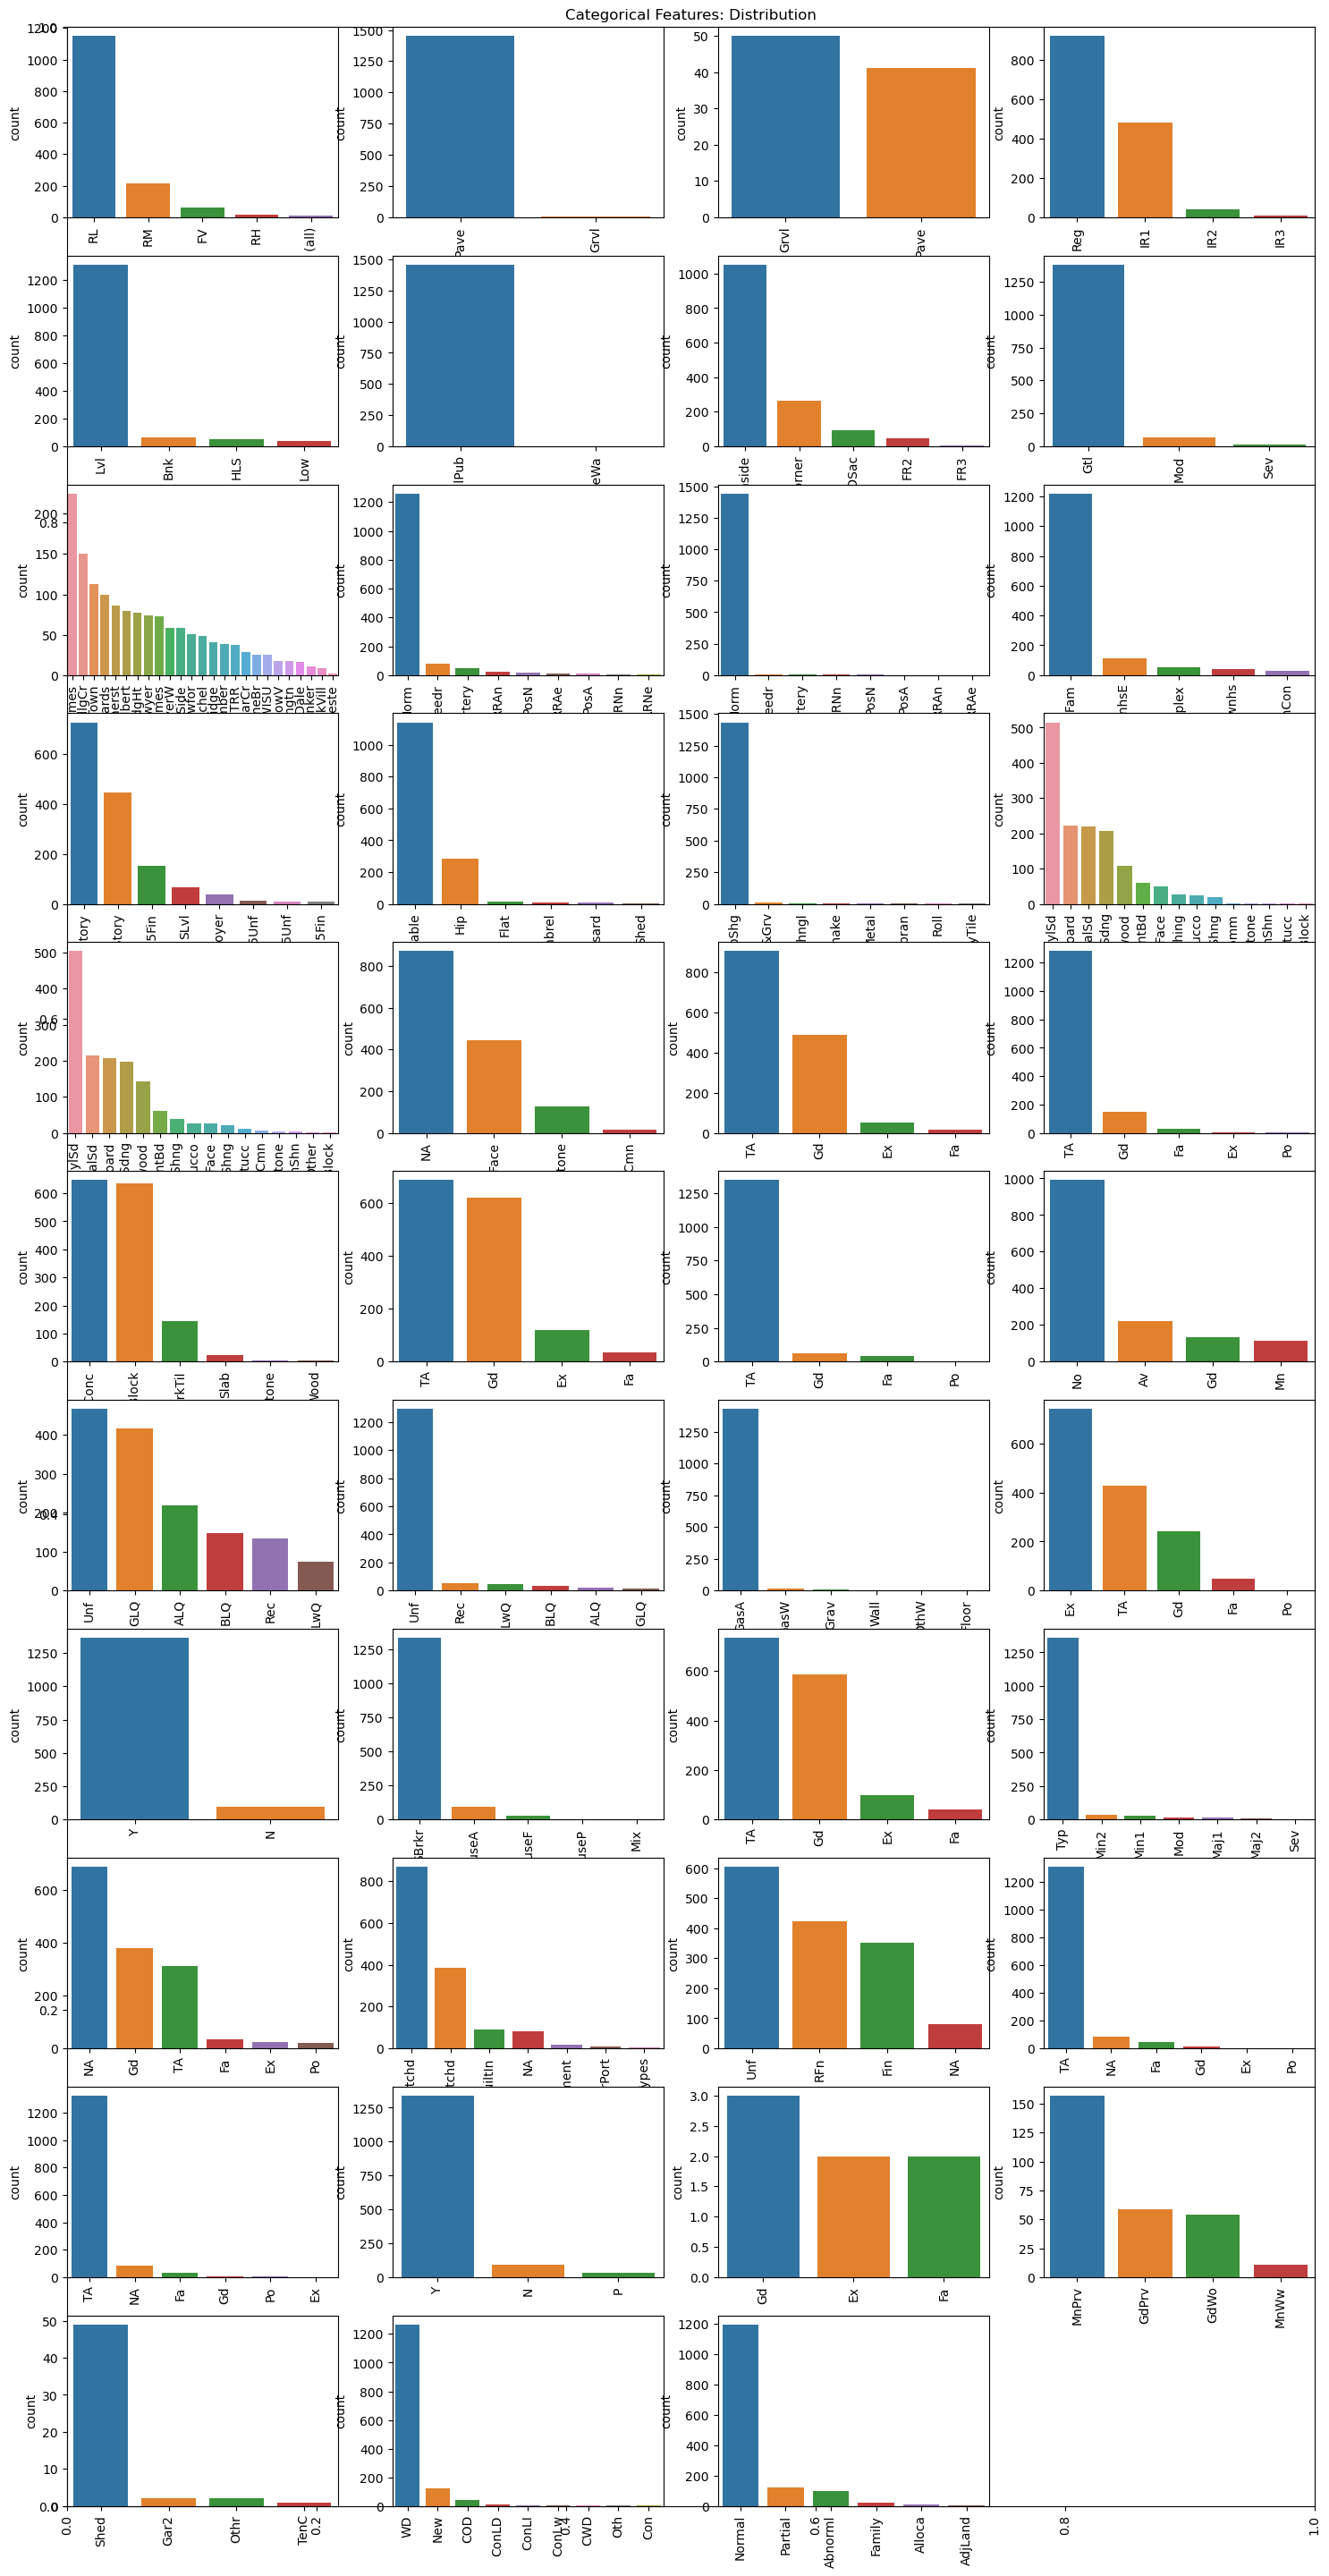

In [9]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
  y = dftrain[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

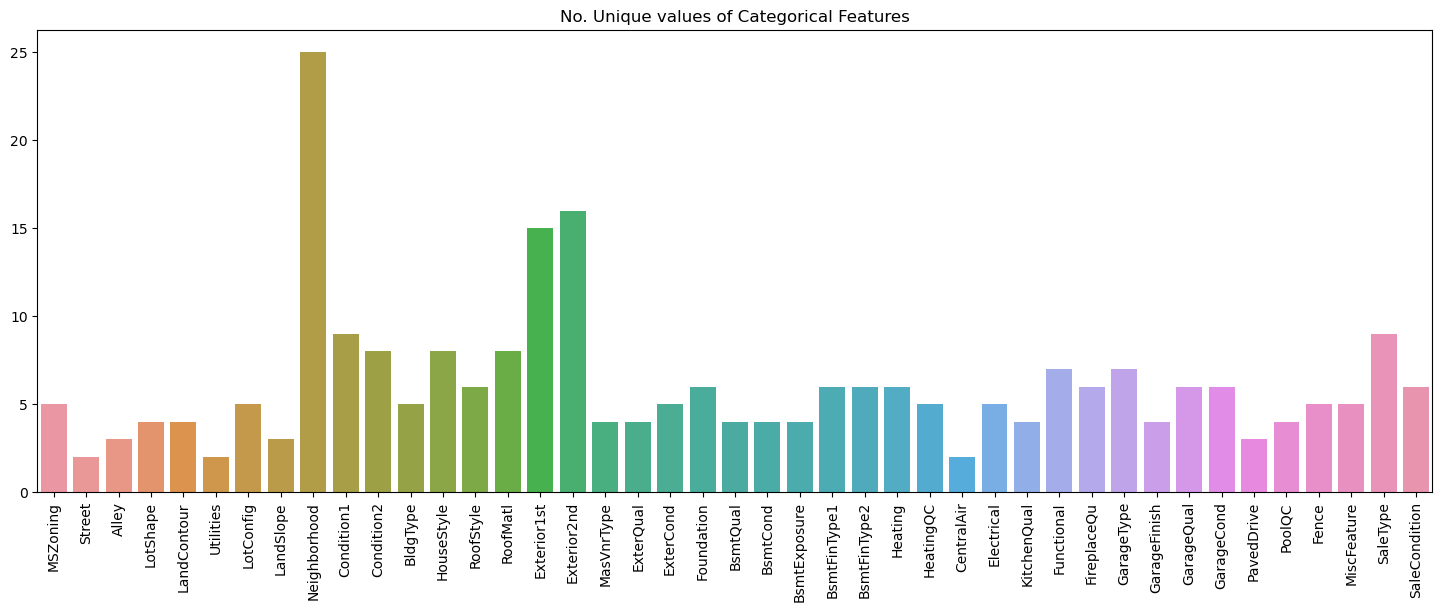

In [10]:
unique_values = []
for col in object_cols:
  unique_values.append(dftrain[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)
     

<Axes: >

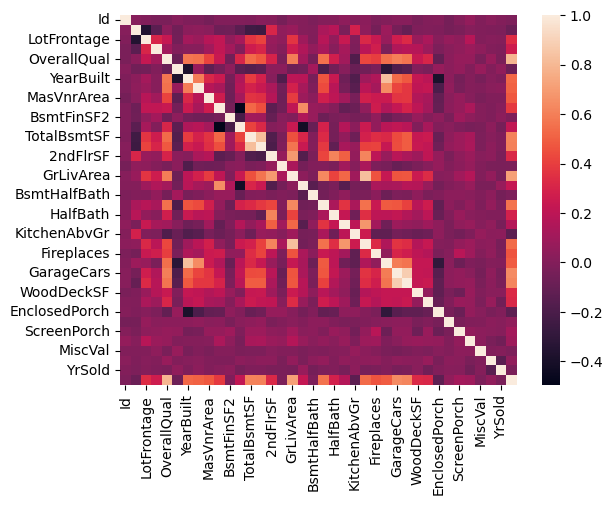

In [11]:
correlation=dftrain.select_dtypes(include=["float64","int64"]).corr()
sns.heatmap(correlation)

In [12]:
dftrain["Utilities"].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

Because of low cardinality we drop the utilities column since most are AllPub offering no new information to the model

In [13]:
#mmulticollineraty
dftrain["GarageCars"].corr(dftrain["GarageArea"])

0.8824754142814629

Because of high multicollinerity between GarageCars and GarageArea which are explanatory variables we choose GarageCars since
it has higher correlation with salesPrice 0.64

We also drop poolArea since most is 0 and on checking the correlation to sales price was low at 0.092 also MiscVal  with correlation coefficient of 0.0211


we perform multiple correspondence analysis for dimensionality reduction our explanatory features are about 81 and on performing
one hot encoding it will increase the number of features requring more computational power
MCA is a dimensionality reduction technique specifically designed for categorical variables.
It analyzes the associations between categorical variables by creating a set of synthetic variables (principal components) that capture the underlying 
structure in the data.
MCA is often used for exploratory analysis and visualization of categorical data, similar to how Principal Component Analysis (PCA)
is used for numerical data.

In [14]:
#subsetting
GarageCon=dftrain[["GarageFinish","GarageQual","GarageCond"]]


In [15]:
from prince import MCA
#create a subset of GARAGE quality,condition
GarageCon=dftrain[["GarageFinish","GarageQual","GarageCond"]]
# Initialize and fit MCA model
mca = MCA()
mca.fit(GarageCon)

# Get transformed data
transformed_data = mca.transform(GarageCon)

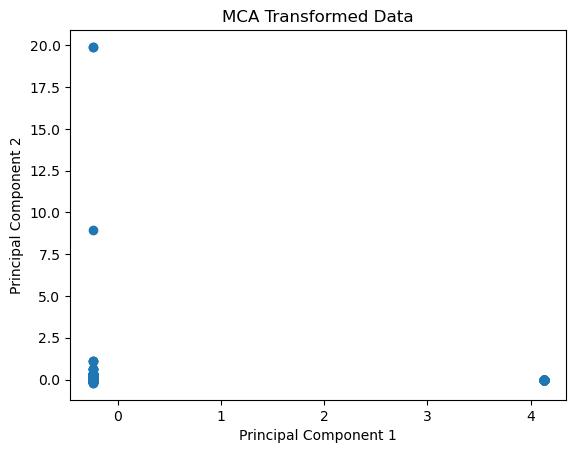

In [16]:

# Plot the first two principal components
plt.scatter(transformed_data[0], transformed_data[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MCA Transformed Data')
plt.show()


In [17]:
dftrain=pd.concat([dftrain,transformed_data],axis=1)
dftrain.rename(columns={0:"Garage0" ,1:"Garage1"},inplace=True)

In [18]:
#multiple correspondence analysis for  basement shows the overall basement condition and quality

In [19]:
dftrain["BsmtUnfSF"].corr(dftrain["SalePrice"])

0.21447910554696892

In [21]:
Basement=dftrain[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]
# Initialize and fit MCA model
mca = MCA()
mca.fit(Basement)

# Get transformed data
transformed = mca.transform(Basement)

# Use the transformed data for further analysis



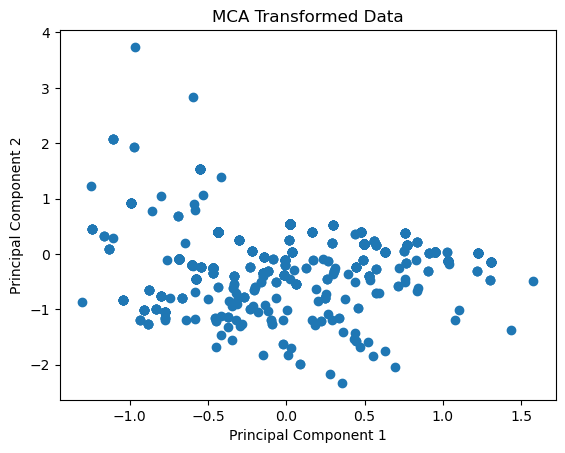

In [22]:
# Plot the first two principal components
plt.scatter(transformed[0], transformed[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MCA Transformed Data')
plt.show()


In [23]:
dftrain=pd.concat([dftrain,transformed],axis=1)
dftrain.rename(columns={0:"Basement0" ,1:"Basement1"},inplace=True)

In [24]:
dftrain.drop(["Id","Fence","MiscFeature","Alley","GarageArea",
              "GarageYrBlt","MiscVal","MiscFeature","PoolQC","PoolArea",
             "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
             "GarageFinish","GarageQual","GarageCond","Utilities"],axis=1,inplace=True)

<Axes: >

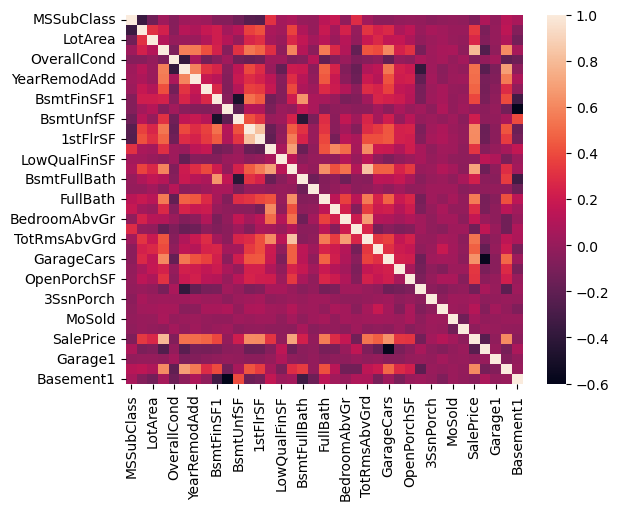

In [26]:
correlation=dftrain.select_dtypes(include=["float64","int64"]).corr()
sns.heatmap(correlation)

###splitting data

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [30]:
y=dftrain["SalePrice"]
x=dftrain.drop(columns=["SalePrice"],axis=1)

In [33]:
ymean=y.mean()
ymean

180921.19589041095

In [41]:
y_pred_baseline=[ymean]*(len(y))

In [43]:
from sklearn.metrics import mean_absolute_error
mae_baseline=mean_absolute_error(y,y_pred_baseline)
mae_baseline

57434.77027584912

In [47]:
c = (x.dtypes == 'object')
object = list(c[c].index)
print("Categorical variables:")
print(object)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']


In [49]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(x[object]))
OH_cols.index = x.index
OH_cols.columns = OH_encoder.get_feature_names_out()
xf = x.drop(object, axis=1)
xf = pd.concat([xf, OH_cols], axis=1)

In [53]:
xf.shape

(1460, 238)

In [62]:
from sklearn.ensemble import RandomForestRegressor

Rr = RandomForestRegressor()

In [63]:
paramsr={"n_estimators":range(20,50,5),
       "max_depth":range(50,100,10)
       
}

In [65]:
modelRr=GridSearchCV(Rr,param_grid=paramsr,cv=2,n_jobs=1,verbose=1)
modelRr.fit(xf,y)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': range(50, 100, 10),
                         'n_estimators': range(20, 50, 5)},
             verbose=1)

In [66]:
Rr1=modelRr.best_estimator_
Rr1

RandomForestRegressor(max_depth=60, n_estimators=45)

In [67]:
y_pred_training=Rr1.predict(xf)
mae_training=mean_absolute_error(y,y_pred_training)
mae_training

6770.591171993911

In [69]:
from sklearn.metrics import mean_absolute_error,accuracy_score,r2_score,mean_squared_error
r2_score(y,y_pred_training)

0.9790248874700342

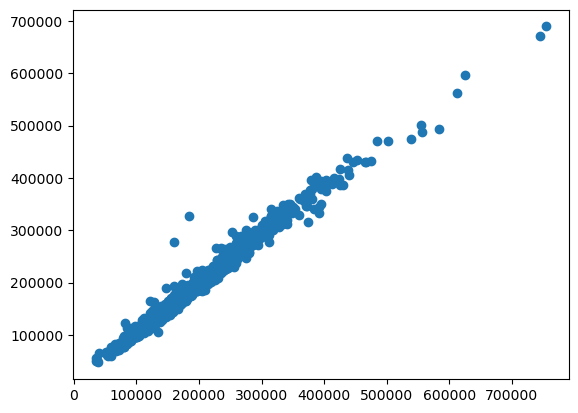

In [70]:
plt.figure()
plt.scatter(y,y_pred_training,label='Random Forest')

In [71]:
#saving the model
import pickle

In [72]:
with open("model_RR1.pkl","wb") as f:
    pickle.dump(Rr1,f)

In [74]:
##preparation of submission data

In [150]:
def data_cleaning(dftrain):
    dftrain['FireplaceQu'].fillna("NA",inplace=True)
    dftrain['GarageType'].fillna("NA",inplace=True)
    dftrain['GarageFinish'].fillna("NA",inplace=True)
    dftrain['GarageQual'].fillna("NA",inplace=True)
    dftrain['GarageCond'].fillna("NA",inplace=True)
    dftrain['MasVnrType'].fillna("NA",inplace=True)
    dftrain['BsmtQual'].fillna(dftrain["BsmtQual"].mode()[0],inplace=True)
    dftrain['MasVnrArea'].fillna(dftrain["MasVnrArea"].mean(),inplace=True)
    dftrain['BsmtCond'].fillna(dftrain["BsmtCond"].mode()[0],inplace=True)
    dftrain['BsmtExposure'].fillna(dftrain["BsmtExposure"].mode()[0],inplace=True)
    dftrain['BsmtFinType1'].fillna(dftrain["BsmtFinType1"].mode()[0],inplace=True)
    dftrain['BsmtFinType2'].fillna(dftrain["BsmtFinType2"].mode()[0],inplace=True)
    dftrain['Electrical'].fillna(dftrain["Electrical"].mode()[0],inplace=True)
    dftrain['LotFrontage'].fillna(dftrain["LotFrontage"].mean(),inplace=True)
    dftrain['BsmtFullBath'].fillna(dftrain["BsmtFullBath"].mean(),inplace=True)
    dftrain['BsmtHalfBath'].fillna(dftrain["BsmtHalfBath"].mean(),inplace=True)
    dftrain['GarageCars'].fillna(dftrain["GarageCars"].mean(),inplace=True)
    dftrain['MSZoning'].fillna(dftrain["MSZoning"].mode()[0],inplace=True)
    dftrain['Exterior1st'].fillna(dftrain["Exterior1st"].mode()[0],inplace=True)
    dftrain['Exterior2nd'].fillna(dftrain["Exterior2nd"].mode()[0],inplace=True)
    dftrain['KitchenQual'].fillna(dftrain["KitchenQual"].mode()[0],inplace=True)
    dftrain['Functional'].fillna(dftrain["Functional"].mode()[0],inplace=True)
    dftrain['BsmtFinSF1'].fillna(dftrain["BsmtFinSF1"].mean(),inplace=True)
    dftrain['BsmtFinSF2'].fillna(dftrain["BsmtFinSF2"].mean(),inplace=True)
    dftrain['BsmtUnfSF'].fillna(dftrain["BsmtUnfSF"].mean(),inplace=True)
    dftrain['TotalBsmtSF'].fillna(dftrain["TotalBsmtSF"].mean(),inplace=True)
    dftrain['SaleType'].fillna(dftrain["SaleType"].mode()[0],inplace=True)
    
    from prince import MCA
    #create a subset of GARAGE quality,condition
    GarageCon=dftrain[["GarageFinish","GarageQual","GarageCond"]]
    # Initialize and fit MCA model
    mca = MCA()
    mca.fit(GarageCon)
    # Get transformed data
    transformed_data = mca.transform(GarageCon)
    # Use the transformed data for further analysis
    dftrain=pd.concat([dftrain,transformed_data],axis=1)
    dftrain.rename(columns={0:"Garage0" ,1:"Garage1"},inplace=True)

    Basement=dftrain[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]
    # Initialize and fit MCA model
    mca = MCA()
    mca.fit(Basement)
    # Get transformed data
    transformed = mca.transform(Basement)
    dftrain=pd.concat([dftrain,transformed],axis=1)
    dftrain.rename(columns={0:"Basement0" ,1:"Basement1"},inplace=True)

    dftrain.drop(["Id","Fence","MiscFeature","Alley","GarageArea",
              "GarageYrBlt","MiscVal","MiscFeature","PoolQC","PoolArea",
             "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
             "GarageFinish","GarageQual","GarageCond","Utilities"],axis=1,inplace=True)

    return dftrain

In [2]:
dftest=pd.read_csv("C:\projects\house prices\house-prices-advanced-regression-techniques/test.csv")
dftest=data_cleaning(dftest)

NameError: name 'data_cleaning' is not defined

In [177]:
dftest.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
SaleCondition    0
Garage0          0
Garage1          0
Basement0        0
Basement1        0
Length: 66, dtype: int64

In [102]:
#def MCA_G(dftrain):
#    from prince import MCA
    #create a subset of GARAGE quality,condition
#    GarageCon=dftrain[["GarageFinish","GarageQual","GarageCond"]]
    #Basement=dftrain[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]
    # Initialize and fit MCA model
#    mca = MCA()
 #   mca.fit(GarageCon)
    # Get transformed data
#    transformed_data = mca.transform(GarageCon)
    #transformed = mca.transform(Basement)
    # Use the transformed data for further analysis
    #dftrain=pd.concat([dftrain,transformed_data],axis=1)
   # dftrain.rename(columns={0:"Garage0" ,1:"Garage1"},inplace=True)


In [103]:
#def MCA_B(dftrain):
    #from prince import MCA
    #Basement=dftrain[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]
    # Initialize and fit MCA model
    #mca = MCA()
    #mca.fit(Basement)
    
    # Get transformed data
    #transformed = mca.transform(Basement)
    #dftrain=pd.concat([dftrain,transformed],axis=1)
    #dftrain.rename(columns={0:"Basement0" ,1:"Basement1"},inplace=True)


In [105]:
#def drop_col(dftrain):
    #dftrain.drop(["Id","Fence","MiscFeature","Alley","GarageArea",
            #  "GarageYrBlt","MiscVal","MiscFeature","PoolQC","PoolArea",
             #"BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
             #"GarageFinish","GarageQual","GarageCond","Utilities"],axis=1,inplace=True)


In [173]:
objects=dftrain.select_dtypes(include=["object"])
encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(encoder.fit_transform(objects))
OH_cols.columns = encoder.get_feature_names_out()
xf = dftest.drop(object, axis=1)
xf = pd.concat([xf, OH_cols], axis=1)

In [178]:
xf.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [181]:
xf.isnull()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [185]:
xf.dropna(inplace=True)

In [187]:
y_pred=Rr1.predict(xf)

In [190]:
sub=pd.DataFrame(y_pred)

In [191]:
sub.to_csv('C:\projects\house prices\Submission.csv')

In [192]:
sub.head(5)

,0
0,129428.888889
1,152172.222222
2,191740.888889
3,187881.555556
4,199028.466667


In [3]:
dftest=pd.read_csv("C:\projects\house prices\house-prices-advanced-regression-techniques/test.csv")
sub=pd.read_csv("C:/projects/house prices/submission.csv")

In [4]:
sub = pd.DataFrame()
sub['Id'] = dftest['Id']
sub['SalePrice'] = sub

In [9]:
sub.set_index("Id",inplace=True)
sub.head(5)

,SalePrice
Id,
1461,1461
1462,1462
1463,1463
1464,1464
1465,1465


In [10]:
sub.to_csv('C:\projects\house prices\Submission1.csv')